In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from scipy import stats
from matplotlib.ticker import MaxNLocator

/Users/jessekommandeur/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
solution_space_df = pd.read_csv('../Data/Experiment 5/Solution Space.csv')
solution_space_df.tail()

,Amino Acid Path
597698,"['Start', 'middle', 'right', 'right', 'middle'..."
597699,"['Start', 'middle', 'right', 'right', 'middle'..."
597700,"['Start', 'middle', 'right', 'right', 'middle'..."
597701,"['Start', 'middle', 'right', 'right', 'middle'..."
597702,"['Start', 'middle', 'right', 'right', 'middle'..."


In [4]:
df = pd.read_csv('../Data/Experiment 1/HP25 experiment 1 1000.csv')
df = df[df['Amino Acid Length'] == 5]

df2 = pd.read_csv('../Data/Experiment 1/HP25 experiment 1 10000.csv')
df2 = df2[df2['Amino Acid Length'] == 5]

df3 = pd.read_csv('../Data/Experiment 1/HP25 experiment 1 100000.csv')
df3 = df3[df3['Amino Acid Length'] == 5]

df4 = pd.read_csv('../Data/Experiment 1/HP25 experiment 1 1000000.csv')
df4 = df4[df4['Amino Acid Length'] == 5]

dfa = pd.read_csv('../Data/Experiment 2/HP200.csv')
dfa = dfa[dfa['Amino Acid Length'] == 5]

dfb = pd.read_csv('../Data/Experiment 3/HP100 experiment 3.csv')
dfb = dfb[dfb['Amino Acid Length'] == 5]

dfc = pd.read_csv('../Data/Experiment 4/HP50 experiment 4.csv')
dfc = dfc[dfc['Amino Acid Length'] == 5]

df4.tail()

,Amino Acid Length,Num Hydrophobic,Num Polar,1D protein,2D protein,Amino Acids on Grid,Trimmed 2D protein,Shape 2D protein,Amino Acid Order,Amino Acid Direction,H-Bonds,H-Ratio
999995,5,3,2,"['H', 'P', 'H', 'H', 'P']",[['' '' '' '' '' '' '' '' '' '']\n ['' '' '' '...,5,[['P' 'H' 'H']\n ['' '' 'P']\n ['' '' 'H']],"(3, 3)","[('H', (5, 5)), ('P', (4, 5)), ('H', (3, 5)), ...","['Start', 'straight', 'straight', 'left', 'str...",0,0.0
999996,5,3,2,"['P', 'P', 'H', 'H', 'H']",[['' '' '' '' '' '' '' '' '' '']\n ['' '' '' '...,5,[['P' 'P' 'H']\n ['' '' 'H']\n ['' '' 'H']],"(3, 3)","[('P', (5, 5)), ('P', (5, 6)), ('H', (5, 7)), ...","['Start', 'straight', 'straight', 'right', 'st...",0,0.0
999997,5,2,3,"['P', 'P', 'H', 'P', 'H']",[['' '' '' '' '' '' '' '' '' '']\n ['' '' '' '...,5,[['P' 'H' 'P']\n ['H' '' 'P']],"(2, 3)","[('P', (5, 5)), ('P', (4, 5)), ('H', (4, 4)), ...","['Start', 'straight', 'left', 'straight', 'left']",0,0.0
999998,5,2,3,"['P', 'P', 'H', 'P', 'H']",[['' '' '' '' '' '' '' '' '' '']\n ['' '' '' '...,5,[['P' 'P' '']\n ['' 'H' '']\n ['' 'P' 'H']],"(3, 3)","[('P', (5, 5)), ('P', (5, 6)), ('H', (6, 6)), ...","['Start', 'straight', 'right', 'straight', 'le...",0,0.0
999999,5,2,3,"['P', 'P', 'H', 'P', 'H']",[['' '' '' '' '' '' '' '' '' '']\n ['' '' '' '...,5,[['P' 'P' 'H']\n ['P' 'H' '']],"(2, 3)","[('P', (5, 5)), ('P', (6, 5)), ('H', (6, 6)), ...","['Start', 'straight', 'left', 'left', 'right']",0,0.0


In [18]:
def shorten_direction(direction_list):
    # Create a dictionary mapping full words to their respective initials
    mapping = {'Start': 'S', 'start': 'S', 'middle': 'M', 'right': 'R', 'left': 'L', 'straight': 'M'}
    # Use the mapping to convert each word to its initial and join them into a string
    return ''.join(mapping[direction] for direction in direction_list)

In [41]:
# Now, we apply this function to the 'Amino Acid Direction' column to create the new shortened row 
# we first need to convert it to an actual list, then apply the function

df['Amino Acid Direction Short'] = df['Amino Acid Direction'].apply(lambda x: shorten_direction(eval(x)))
dfa['Amino Acid Direction Short'] = dfa['Amino Acid Direction'].apply(lambda x: shorten_direction(eval(x)))
dfb['Amino Acid Direction Short'] = dfb['Amino Acid Direction'].apply(lambda x: shorten_direction(eval(x)))
dfc['Amino Acid Direction Short'] = dfc['Amino Acid Direction'].apply(lambda x: shorten_direction(eval(x)))

df2['Amino Acid Direction Short'] = df2['Amino Acid Direction'].apply(lambda x: shorten_direction(eval(x)))
df3['Amino Acid Direction Short'] = df3['Amino Acid Direction'].apply(lambda x: shorten_direction(eval(x)))
df4['Amino Acid Direction Short'] = df4['Amino Acid Direction'].apply(lambda x: shorten_direction(eval(x)))

# Show the updated DataFrame with the new shortened direction strings
df[['Amino Acid Direction', 'Amino Acid Direction Short']].head()

,Amino Acid Direction,Amino Acid Direction Short
0,"['Start', 'straight', 'left', 'left', 'right']",SMLLR
1,"['Start', 'straight', 'right', 'left', 'left']",SMRLL
2,"['Start', 'straight', 'straight', 'left', 'str...",SMMLM
3,"['Start', 'straight', 'right', 'right', 'strai...",SMRRM
4,"['Start', 'straight', 'right', 'right', 'left']",SMRRL
...,...,...
995,"['Start', 'straight', 'straight', 'straight', ...",SMMML
996,"['Start', 'straight', 'right', 'left', 'left']",SMRLL
997,"['Start', 'straight', 'straight', 'right', 'st...",SMMRM
998,"['Start', 'straight', 'right', 'right', 'strai...",SMRRM


In [51]:
data = df.groupby(['Amino Acid Direction Short'])['Amino Acid Length'].count().sort_values(ascending=False)
dataa = dfa.groupby(['Amino Acid Direction Short'])['Amino Acid Length'].count().sort_values(ascending=False)
datab = dfb.groupby(['Amino Acid Direction Short'])['Amino Acid Length'].count().sort_values(ascending=False)
datac = dfc.groupby(['Amino Acid Direction Short'])['Amino Acid Length'].count().sort_values(ascending=False)

In [44]:
data2 = df2.groupby(['Amino Acid Direction Short'])['Amino Acid Length'].count().sort_values(ascending=False)
data3 = df3.groupby(['Amino Acid Direction Short'])['Amino Acid Length'].count().sort_values(ascending=False)
data4 = df4.groupby(['Amino Acid Direction Short'])['Amino Acid Length'].count().sort_values(ascending=False)

In [45]:
series1 = pd.Series(data, name='Frequency').reset_index()
series1['Experiment'] = 'Experiment 1'
series1.rename(columns={'index': 'Amino Acid Direction'}, inplace=True)

series2 = pd.Series(dataa, name='Frequency').reset_index()
series2['Experiment'] = 'Experiment 2'
series2.rename(columns={'index': 'Amino Acid Direction'}, inplace=True)

series3 = pd.Series(datab, name='Frequency').reset_index()
series3['Experiment'] = 'Experiment 3'
series3.rename(columns={'index': 'Amino Acid Direction'}, inplace=True)

series4 = pd.Series(datac, name='Frequency').reset_index()
series4['Experiment'] = 'Experiment 4'
series4.rename(columns={'index': 'Amino Acid Direction'}, inplace=True)
series1.head()

,Amino Acid Direction Short,Frequency,Experiment
0,SMLLR,57,Experiment 1
1,SMRRL,53,Experiment 1
2,SMRRM,51,Experiment 1
3,SMLML,51,Experiment 1
4,SMMRR,48,Experiment 1


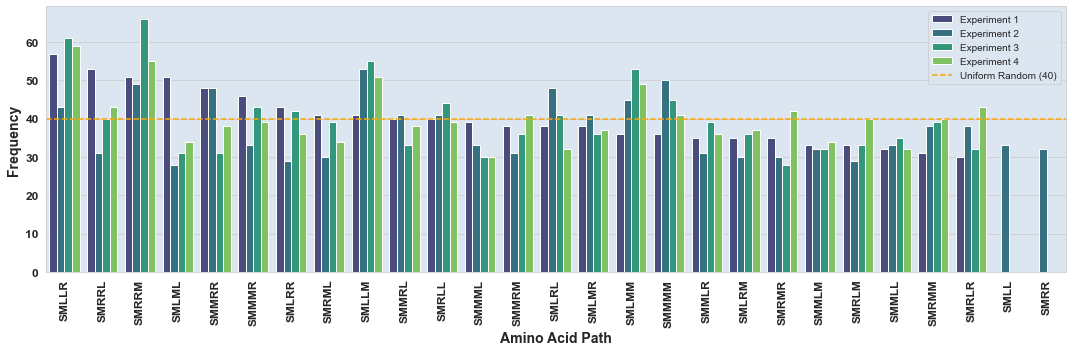

In [37]:
# Combine the series into a single DataFrame
combined_data = pd.concat([series1, series2, series3, series4], axis=0, ignore_index=True)

# Plotting the histograms
plt.figure(figsize=(15, 5))
sns.barplot(x='Amino Acid Direction Short', y='Frequency', hue='Experiment', data=combined_data, palette='viridis')
plt.axhline(y=40, color='orange', linestyle='--', label='Uniform Random (40)')


# Customize the plot
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})
plt.xlabel('Amino Acid Path', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
# plt.title('Frequency of Amino Acid Paths by Experiment', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(loc='upper right')
plt.tight_layout()

# Display the plot
# plt.savefig("Amino acid directions by experiment.png", format='png', dpi=1000)
plt.show()

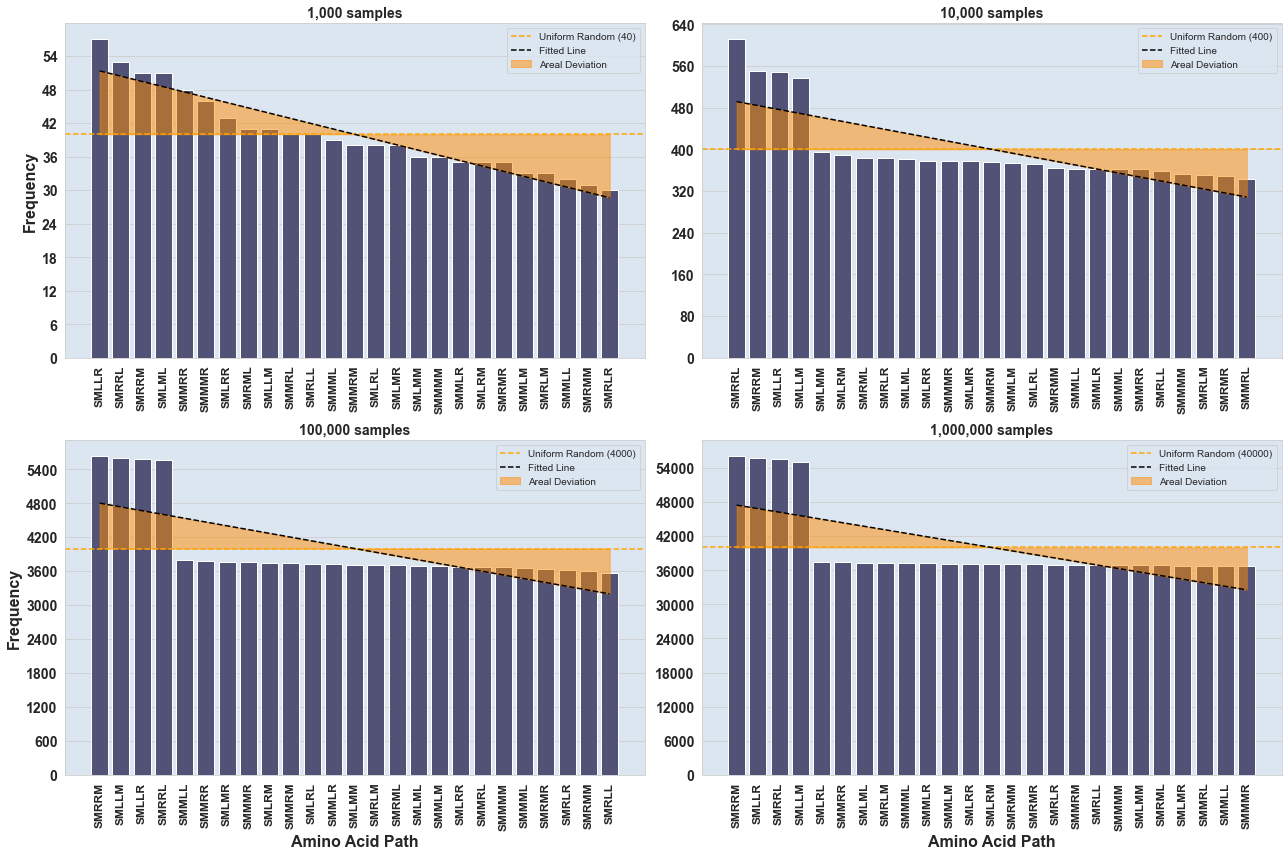

In [118]:
warnings.filterwarnings('ignore')

# Apply Seaborn style
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Data and titles for each subplot
datasets = [data, data2, data3, data4]
titles = ['1,000 samples', '10,000 samples', '100,000 samples', '1,000,000 samples']
uniform_lines = [40, 400, 4000, 40000]  # Horizontal lines for uniform data

# Iterate through datasets, titles, and uniform lines
for i, (dataset, title, uniform_line) in enumerate(zip(datasets, titles, uniform_lines)):
    ax = sns.barplot(x=dataset.index, y=dataset.values, color='#4c4c7c', ax=axs[i//2, i%2])
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold', rotation=90)
    
    # Set y-ticks to be integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Update y-axis tick label font properties
    for label in ax.get_yticklabels():
        label.set_fontsize(14)
        label.set_fontweight('bold')
    
    # Set labels conditionally
    if i == 2 or i == 3:  # For figures 3 and 4
        ax.set_xlabel("Amino Acid Path", fontsize=16, fontweight='bold')
    else:
        ax.set_xlabel("")  # Hide the x-axis label for figures 1 and 2

    if i == 0 or i == 2:  # For figures 1 and 3
        ax.set_ylabel("Frequency", fontsize=16, fontweight='bold')
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axhline(y=uniform_line, color='orange', linestyle='--', label=f'Uniform Random ({uniform_line})')

    # Fitting and plotting the line
    x_coords = np.arange(len(dataset))
    z = np.polyfit(x_coords, dataset, 1)
    p = np.poly1d(z)
    ax.plot(x_coords, p(x_coords), "g--", label='Fitted Line', color='black')

    # Fill the area between the two lines
    ax.fill_between(x_coords, uniform_line, p(x_coords), where=(p(x_coords) >= uniform_line), interpolate=True, color='darkorange', alpha=0.5, label='Areal Deviation')
    ax.fill_between(x_coords, uniform_line, p(x_coords), where=(p(x_coords) <= uniform_line), interpolate=True, color='darkorange', alpha=0.5)

    ax.legend(fontsize=10)

plt.tight_layout()
# plt.savefig("Sample_distribution_experiment_1.png", format='png', dpi=500)
plt.show()

In [45]:
def shorten_and_mirror(direction_list):
    # Mapping for shortening
    mapping = {'Start': 'S', 'middle': 'M', 'right': 'R', 'left': 'L', 'straight': 'M'}

    # Shorten the direction list
    shortened = ''.join(mapping[direction] for direction in direction_list)

    # Generate mirrored version
    mirrored_mapping = {'R': 'L', 'L': 'R'}  # Swap R and L for mirroring
    mirrored = ''.join(mirrored_mapping.get(ch, ch) for ch in shortened)

    # Return the lexicographically first sequence (original or mirrored)
    return min(shortened, mirrored)

# Apply the function to the DataFrame columns
df['Amino Acid Direction Short2'] = df['Amino Acid Direction'].apply(lambda x: shorten_and_mirror(eval(x)))
df2['Amino Acid Direction Short2'] = df2['Amino Acid Direction'].apply(lambda x: shorten_and_mirror(eval(x)))
df3['Amino Acid Direction Short2'] = df3['Amino Acid Direction'].apply(lambda x: shorten_and_mirror(eval(x)))
df4['Amino Acid Direction Short2'] = df4['Amino Acid Direction'].apply(lambda x: shorten_and_mirror(eval(x)))

# Display the updated DataFrame
df4[['Amino Acid Direction', 'Amino Acid Direction Short', 'Amino Acid Direction Short2']]

,Amino Acid Direction,Amino Acid Direction Short,Amino Acid Direction Short2
0,"['Start', 'straight', 'left', 'straight', 'left']",SMLML,SMLML
1,"['Start', 'straight', 'right', 'right', 'left']",SMRRL,SMLLR
2,"['Start', 'straight', 'straight', 'straight', ...",SMMML,SMMML
3,"['Start', 'straight', 'right', 'left', 'right']",SMRLR,SMLRL
4,"['Start', 'straight', 'left', 'right', 'left']",SMLRL,SMLRL
...,...,...,...
999995,"['Start', 'straight', 'straight', 'left', 'str...",SMMLM,SMMLM
999996,"['Start', 'straight', 'straight', 'right', 'st...",SMMRM,SMMLM
999997,"['Start', 'straight', 'left', 'straight', 'left']",SMLML,SMLML
999998,"['Start', 'straight', 'right', 'straight', 'le...",SMRML,SMLMR


In [46]:
data5 = df.groupby(['Amino Acid Direction Short2'])['Amino Acid Length'].count().sort_values(ascending=False)
data6 = df2.groupby(['Amino Acid Direction Short2'])['Amino Acid Length'].count().sort_values(ascending=False)
data7 = df3.groupby(['Amino Acid Direction Short2'])['Amino Acid Length'].count().sort_values(ascending=False)
data8 = df4.groupby(['Amino Acid Direction Short2'])['Amino Acid Length'].count().sort_values(ascending=False)

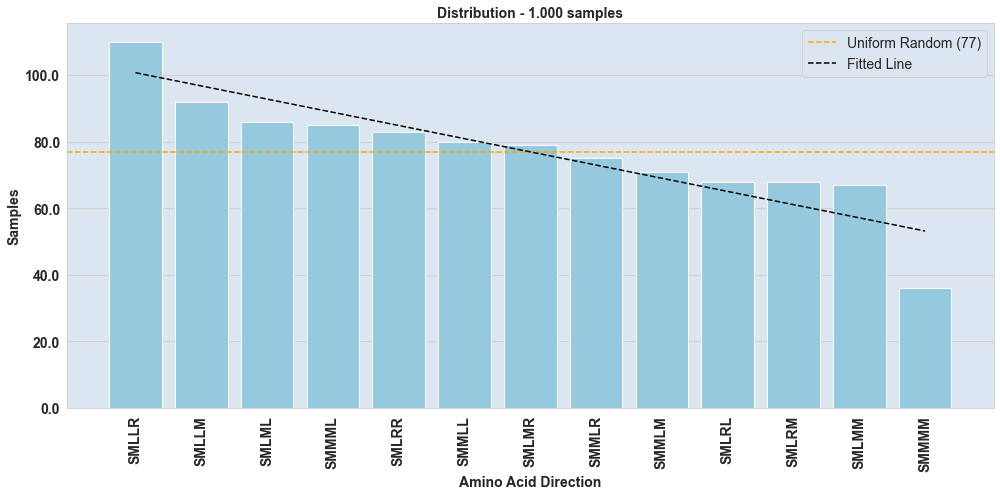

In [53]:
# Apply Seaborn style
sns.set_style("whitegrid", {"axes.facecolor": "#DCE6F1"})

ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold', rotation=90)

# Plotting the bar plot
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=data5.index, y=data5.values, color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, fontweight='bold', rotation=90)
ax.set_yticklabels(ax.get_yticks(), fontsize=14, fontweight='bold')
ax.set_xlabel("Amino Acid Direction", fontsize=14, fontweight='bold')
ax.set_ylabel("Samples", fontsize=14, fontweight='bold')
plt.title('Distribution - 1.000 samples', fontsize=14, fontweight='bold')

# Horizontal line at y=40
plt.axhline(y=77, color='orange', linestyle='--', label='Uniform Random (77)')

# Fitting a line to the data
# Get the x coordinates for the bars
x_coords = np.arange(len(data5))
# Fit a line to the data
z = np.polyfit(x_coords, data5, 1)
p = np.poly1d(z)
# Plot the line
plt.plot(x_coords, p(x_coords), "g--", label='Fitted Line', color='black')

# Show the plot with legend
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()